In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
customers = pd.read_csv(r'D:\Projects\New folder\customers.csv')
products = pd.read_csv(r'D:\Projects\New folder\products.csv')
returns = pd.read_csv(r'D:\Projects\New folder\returns.csv')
sales_data = pd.read_csv(r'D:\Projects\New folder\sales_data.csv')
stores = pd.read_csv(r'D:\Projects\New folder\stores.csv')

In [3]:
customers.head(10)
#products.head(10)
#returns.head(10)
#sales_data.head(10)
#stores.head(10)

,customer_id,first_name,last_name,gender,age,signup_date,region
0,C0000,Patrick,Morgan,Male,18.0,2024-07-11,South
1,C0001,Eric,Lee,Other,36.0,2020-09-20,East
2,C0002,Thomas,Pena,Female,NaN,2021-03-07,East
3,C0003,Dalton,Duran,Male,24.0,2021-08-29,South
4,C0004,Travis,Mcclain,Male,50.0,2023-03-29,South
5,C0005,Brian,Kelley,Male,68.0,2024-11-21,North
6,C0006,Alyssa,Sandoval,Female,47.0,2025-02-08,North
7,C0007,Theresa,Wright,Male,70.0,2022-12-08,South
8,C0008,Alyssa,Estrada,Male,48.0,2023-08-22,East
9,C0009,Karen,Clark,Female,62.0,2023-05-31,East


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  816 non-null    object 
 1   first_name   816 non-null    object 
 2   last_name    816 non-null    object 
 3   gender       816 non-null    object 
 4   age          776 non-null    float64
 5   signup_date  816 non-null    object 
 6   region       816 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB


In [5]:
# pd.isnull(customers).sum()
# pd.isnull(products).sum()
# pd.isnull(returns).sum()
# pd.isnull(sales_data).sum()
pd.isnull(stores).sum()

store_id          0
store_name        0
store_type        0
region            0
city              0
operating_cost    0
dtype: int64

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  816 non-null    object 
 1   first_name   816 non-null    object 
 2   last_name    816 non-null    object 
 3   gender       816 non-null    object 
 4   age          776 non-null    float64
 5   signup_date  816 non-null    object 
 6   region       816 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB


In [8]:
sales_data.fillna({"store_id": "Online"}, inplace=True)  # Replace missing store IDs  

In [11]:
sales_data.head(10)

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
0,O00000,2024-01-31,C0125,P1086,Online,Online,2,80.63,0.05,153.20
1,O00001,2024-09-29,C0633,P0973,S042,In-Store,20,209.16,0.05,3974.00
2,O00002,2023-08-29,C0653,P0659,Online,Online,2,218.60,0.10,393.48
3,O00003,2024-05-13,C0753,P0666,S014,In-Store,1,78.53,0.20,62.82
4,O00004,2024-07-22,C0627,P0166,S017,In-Store,1,344.93,0.20,275.94
5,O00005,2024-12-16,C0716,P0205,S018,In-Store,1,14.31,0.05,13.59
6,O00006,2023-09-25,C0532,P1171,S045,In-Store,2,230.62,0.00,461.24
7,O00007,2023-09-27,C0515,P0178,S043,In-Store,2,129.07,0.20,206.51
8,O00008,2024-03-01,C0456,P0236,S034,In-Store,2,196.93,0.05,374.17
9,O00009,2023-12-02,C0174,P0183,Online,Online,3,304.66,0.00,913.98


In [16]:
median_age = customers['age'].median()
customers['age'] = customers['age'].fillna(median_age)


In [18]:
customers.head(60)

,customer_id,first_name,last_name,gender,age,signup_date,region
0,C0000,Patrick,Morgan,Male,18.0,2024-07-11,South
1,C0001,Eric,Lee,Other,36.0,2020-09-20,East
2,C0002,Thomas,Pena,Female,44.0,2021-03-07,East
3,C0003,Dalton,Duran,Male,24.0,2021-08-29,South
4,C0004,Travis,Mcclain,Male,50.0,2023-03-29,South
5,C0005,Brian,Kelley,Male,68.0,2024-11-21,North
6,C0006,Alyssa,Sandoval,Female,47.0,2025-02-08,North
7,C0007,Theresa,Wright,Male,70.0,2022-12-08,South
8,C0008,Alyssa,Estrada,Male,48.0,2023-08-22,East
9,C0009,Karen,Clark,Female,62.0,2023-05-31,East


In [21]:
pd.isnull(customers).sum()

customer_id    0
first_name     0
last_name      0
gender         0
age            0
signup_date    0
region         0
dtype: int64

In [23]:
products['brand'] = products['brand'].fillna('Unknown')
# products.fillna({"brand": "Unknown"}, inplace=True) 

In [25]:
pd.isnull(products).sum()

product_id      0
product_name    0
category        0
brand           0
cost_price      0
unit_price      0
margin_pct      0
dtype: int64

In [27]:
products.head(60)

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
0,P0000,BrandA Shoulder,Electronics,BrandC,52.75,64.65,18.41
1,P0001,BrandA Responsibility,Electronics,BrandD,11.20,13.26,15.54
2,P0002,BrandB Small,Electronics,BrandB,144.62,250.37,42.24
3,P0003,BrandD Continue,Apparel,BrandD,119.91,219.25,45.31
4,P0004,BrandA Indeed,Apparel,BrandD,71.35,88.47,19.35
5,P0005,BrandC Cut,Electronics,BrandA,79.09,112.55,29.73
6,P0006,BrandC Air,Home & Kitchen,BrandA,147.30,233.12,36.81
7,P0007,BrandD State,Electronics,BrandC,166.73,276.22,39.64
8,P0008,BrandC Growth,Apparel,BrandA,13.94,18.19,23.36
9,P0009,BrandC Keep,Electronics,BrandB,173.96,250.87,30.66


In [29]:
# pd.isnull(customers).sum()
# pd.isnull(products).sum()
# pd.isnull(returns).sum()
# pd.isnull(sales_data).sum()
# pd.isnull(stores).sum()

print("Nulls in customers:\n", pd.isnull(customers).sum(), "\n")
print("Nulls in products:\n", pd.isnull(products).sum(), "\n")
print("Nulls in returns:\n", pd.isnull(returns).sum(), "\n")
print("Nulls in sales_data:\n", pd.isnull(sales_data).sum(), "\n")
print("Nulls in stores:\n", pd.isnull(stores).sum(), "\n")

Nulls in customers:
 customer_id    0
first_name     0
last_name      0
gender         0
age            0
signup_date    0
region         0
dtype: int64 

Nulls in products:
 product_id      0
product_name    0
category        0
brand           0
cost_price      0
unit_price      0
margin_pct      0
dtype: int64 

Nulls in returns:
 return_id        0
order_id         0
return_date      0
return_reason    0
dtype: int64 

Nulls in sales_data:
 order_id         0
order_date       0
customer_id      0
product_id       0
store_id         0
sales_channel    0
quantity         0
unit_price       0
discount_pct     0
total_amount     0
dtype: int64 

Nulls in stores:
 store_id          0
store_name        0
store_type        0
region            0
city              0
operating_cost    0
dtype: int64 



In [31]:
# customers.shape
# products.shape
# returns.shape
# sales_data.shape
# stores.shape

print("customers.shape:", customers.shape)
print("products.shape:", products.shape)
print("returns.shape:", returns.shape)
print("sales_data.shape:", sales_data.shape)
print("stores.shape:", stores.shape)


customers.shape: (816, 7)
products.shape: (1224, 7)
returns.shape: (204, 4)
sales_data.shape: (3060, 10)
stores.shape: (61, 6)


In [33]:
# duplicates = products.duplicated().sum()
# print("Duplicate rows:", duplicates)

print("Duplicates in customers:", customers.duplicated().sum())
print("Duplicates in products:", products.duplicated().sum())
print("Duplicates in returns:", returns.duplicated().sum())
print("Duplicates in sales_data:", sales_data.duplicated().sum())
print("Duplicates in stores:", stores.duplicated().sum())


Duplicates in customers: 16
Duplicates in products: 24
Duplicates in returns: 4
Duplicates in sales_data: 60
Duplicates in stores: 1


In [35]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
returns.drop_duplicates(inplace=True)
sales_data.drop_duplicates(inplace=True)
stores.drop_duplicates(inplace=True)

In [37]:
print("Duplicates in customers:", customers.duplicated().sum())
print("Duplicates in products:", products.duplicated().sum())
print("Duplicates in returns:", returns.duplicated().sum())
print("Duplicates in sales_data:", sales_data.duplicated().sum())
print("Duplicates in stores:", stores.duplicated().sum())

Duplicates in customers: 0
Duplicates in products: 0
Duplicates in returns: 0
Duplicates in sales_data: 0
Duplicates in stores: 0


In [39]:

print("customers.shape:", customers.shape)
print("products.shape:", products.shape)
print("returns.shape:", returns.shape)
print("sales_data.shape:", sales_data.shape)
print("stores.shape:", stores.shape)


customers.shape: (800, 7)
products.shape: (1200, 7)
returns.shape: (200, 4)
sales_data.shape: (3000, 10)
stores.shape: (60, 6)


In [41]:
print("customers.columns:", customers.columns)
print("products.columns:", products.columns)
print("returns.columns:", returns.columns)
print("sales_data.columns:", sales_data.columns)
print("stores.columns:", stores.columns)


customers.columns: Index(['customer_id', 'first_name', 'last_name', 'gender', 'age',
       'signup_date', 'region'],
      dtype='object')
products.columns: Index(['product_id', 'product_name', 'category', 'brand', 'cost_price',
       'unit_price', 'margin_pct'],
      dtype='object')
returns.columns: Index(['return_id', 'order_id', 'return_date', 'return_reason'], dtype='object')
sales_data.columns: Index(['order_id', 'order_date', 'customer_id', 'product_id', 'store_id',
       'sales_channel', 'quantity', 'unit_price', 'discount_pct',
       'total_amount'],
      dtype='object')
stores.columns: Index(['store_id', 'store_name', 'store_type', 'region', 'city',
       'operating_cost'],
      dtype='object')


In [43]:

print("customers.info:", customers.info())
print("products.info:", products.info())
print("returns.info:", returns.info())
print("sales_data.info:", sales_data.info())
print("stores.info:", stores.info())


<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  800 non-null    object 
 1   first_name   800 non-null    object 
 2   last_name    800 non-null    object 
 3   gender       800 non-null    object 
 4   age          800 non-null    float64
 5   signup_date  800 non-null    object 
 6   region       800 non-null    object 
dtypes: float64(1), object(6)
memory usage: 50.0+ KB
customers.info: None
<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1200 non-null   object 
 1   product_name  1200 non-null   object 
 2   category      1200 non-null   object 
 3   brand         1200 non-null   object 
 4   cost_price    1200 non-null   float64
 5   unit_price    1200 non-null   float64
 6  

In [45]:
# Convert signup_date to datetime
customers['signup_date'] = pd.to_datetime(customers['signup_date'])

# Ensure age is numeric (int)
customers['age'] = customers['age'].astype(int)

In [47]:
print("customers.info:", customers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  800 non-null    object        
 1   first_name   800 non-null    object        
 2   last_name    800 non-null    object        
 3   gender       800 non-null    object        
 4   age          800 non-null    int32         
 5   signup_date  800 non-null    datetime64[ns]
 6   region       800 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 46.9+ KB
customers.info: None


In [49]:
# Convert column types to match documented schema (customers.csv)

# Convert object columns to proper string types
customers['customer_id'] = customers['customer_id'].astype('string')
customers['first_name'] = customers['first_name'].astype('string')
customers['last_name'] = customers['last_name'].astype('string')
customers['gender'] = customers['gender'].astype('string')
customers['region'] = customers['region'].astype('string')

# Convert date column
customers['signup_date'] = pd.to_datetime(customers['signup_date'])

# Convert age to integer (nullable safe type)
customers['age'] = customers['age'].astype('Int64')

# Check result
customers.dtypes


customer_id    string[python]
first_name     string[python]
last_name      string[python]
gender         string[python]
age                     Int64
signup_date    datetime64[ns]
region         string[python]
dtype: object

In [51]:
print("customers.info:", customers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  800 non-null    string        
 1   first_name   800 non-null    string        
 2   last_name    800 non-null    string        
 3   gender       800 non-null    string        
 4   age          800 non-null    Int64         
 5   signup_date  800 non-null    datetime64[ns]
 6   region       800 non-null    string        
dtypes: Int64(1), datetime64[ns](1), string(5)
memory usage: 50.8 KB
customers.info: None


In [53]:
# Convert data types in sales_data.csv

sales_data['order_id'] = sales_data['order_id'].astype('string')
sales_data['customer_id'] = sales_data['customer_id'].astype('string')
sales_data['product_id'] = sales_data['product_id'].astype('string')
sales_data['store_id'] = sales_data['store_id'].astype('string')
sales_data['sales_channel'] = sales_data['sales_channel'].astype('string')

sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

sales_data['quantity'] = sales_data['quantity'].astype(int)
sales_data['unit_price'] = sales_data['unit_price'].astype(float)
sales_data['discount_pct'] = sales_data['discount_pct'].astype(float)
sales_data['total_amount'] = sales_data['total_amount'].astype(float)

sales_data.dtypes

order_id         string[python]
order_date       datetime64[ns]
customer_id      string[python]
product_id       string[python]
store_id         string[python]
sales_channel    string[python]
quantity                  int32
unit_price              float64
discount_pct            float64
total_amount            float64
dtype: object

In [55]:
print("sales_data.info:", sales_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3000 non-null   string        
 1   order_date     3000 non-null   datetime64[ns]
 2   customer_id    3000 non-null   string        
 3   product_id     3000 non-null   string        
 4   store_id       3000 non-null   string        
 5   sales_channel  3000 non-null   string        
 6   quantity       3000 non-null   int32         
 7   unit_price     3000 non-null   float64       
 8   discount_pct   3000 non-null   float64       
 9   total_amount   3000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), string(5)
memory usage: 246.1 KB
sales_data.info: None


In [57]:
products['product_id'] = products['product_id'].astype('string')
products['product_name'] = products['product_name'].astype('string')
products['category'] = products['category'].astype('string')
products['brand'] = products['brand'].astype('string')

products['cost_price'] = products['cost_price'].astype(float)
products['unit_price'] = products['unit_price'].astype(float)
products['margin_pct'] = products['margin_pct'].astype(float)

products.dtypes

print("products.info:", products.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1200 non-null   string 
 1   product_name  1200 non-null   string 
 2   category      1200 non-null   string 
 3   brand         1200 non-null   string 
 4   cost_price    1200 non-null   float64
 5   unit_price    1200 non-null   float64
 6   margin_pct    1200 non-null   float64
dtypes: float64(3), string(4)
memory usage: 75.0 KB
products.info: None


In [59]:
stores['store_id'] = stores['store_id'].astype('string')
stores['store_name'] = stores['store_name'].astype('string')
stores['store_type'] = stores['store_type'].astype('string')
stores['region'] = stores['region'].astype('string')
stores['city'] = stores['city'].astype('string')

stores['operating_cost'] = stores['operating_cost'].astype(float)

stores.dtypes

print("stores.info:", stores.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store_id        60 non-null     string 
 1   store_name      60 non-null     string 
 2   store_type      60 non-null     string 
 3   region          60 non-null     string 
 4   city            60 non-null     string 
 5   operating_cost  60 non-null     float64
dtypes: float64(1), string(5)
memory usage: 3.3 KB
stores.info: None


In [61]:
returns['return_id'] = returns['return_id'].astype('string')
returns['order_id'] = returns['order_id'].astype('string')
returns['return_reason'] = returns['return_reason'].astype('string')
returns['return_date'] = pd.to_datetime(returns['return_date'])

returns.dtypes

print("returns.info:", returns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   return_id      200 non-null    string        
 1   order_id       200 non-null    string        
 2   return_date    200 non-null    datetime64[ns]
 3   return_reason  200 non-null    string        
dtypes: datetime64[ns](1), string(3)
memory usage: 7.8 KB
returns.info: None


In [63]:
stores.head(60)

,store_id,store_name,store_type,region,city,operating_cost
0,S000,Vincent Inc Store,Franchise,West,Chicago,62538.56
1,S001,Wilson Inc Store,Flagship,East,Chicago,26957.43
2,S002,Washington-Trujillo Store,Franchise,North,Los Angeles,66101.63
3,S003,Santana and Sons Store,Franchise,South,Phoenix,71089.40
4,S004,Oconnor-Rhodes Store,Franchise,East,Los Angeles,40965.26
5,S005,Mayer-Scott Store,Flagship,North,Houston,14898.94
6,S006,"Stewart, Lowe and Quinn Store",Flagship,North,Los Angeles,75679.22
7,S007,Marshall PLC Store,Flagship,North,Los Angeles,51484.15
8,S008,Mcdaniel-Bennett Store,Flagship,South,Phoenix,15471.52
9,S009,"Rasmussen, Meyers and Mendoza Store",Franchise,West,Chicago,21491.12


In [65]:
cost_map = products.set_index('product_id')['cost_price'].to_dict()
sales_data['cost_price'] = sales_data['product_id'].map(cost_map)

sales_data['profit'] = sales_data['total_amount'] - (sales_data['quantity'] * sales_data['cost_price'])
sales_data.head(6)

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount,cost_price,profit
0,O00000,2024-01-31,C0125,P1086,Online,Online,2,80.63,0.05,153.20,69.87,13.46
1,O00001,2024-09-29,C0633,P0973,S042,In-Store,20,209.16,0.05,3974.00,120.11,1571.80
2,O00002,2023-08-29,C0653,P0659,Online,Online,2,218.60,0.10,393.48,173.17,47.14
3,O00003,2024-05-13,C0753,P0666,S014,In-Store,1,78.53,0.20,62.82,65.86,-3.04
4,O00004,2024-07-22,C0627,P0166,S017,In-Store,1,344.93,0.20,275.94,174.83,101.11
5,O00005,2024-12-16,C0716,P0205,S018,In-Store,1,14.31,0.05,13.59,7.90,5.69


In [67]:
customers['age_group'] = pd.cut(customers['age'],
                                   bins=[0, 18, 30, 45, 60, 100],
                                   labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

customers.head(6)

,customer_id,first_name,last_name,gender,age,signup_date,region,age_group
0,C0000,Patrick,Morgan,Male,18,2024-07-11,South,Teen
1,C0001,Eric,Lee,Other,36,2020-09-20,East,Adult
2,C0002,Thomas,Pena,Female,44,2021-03-07,East,Adult
3,C0003,Dalton,Duran,Male,24,2021-08-29,South,Young Adult
4,C0004,Travis,Mcclain,Male,50,2023-03-29,South,Middle Age
5,C0005,Brian,Kelley,Male,68,2024-11-21,North,Senior


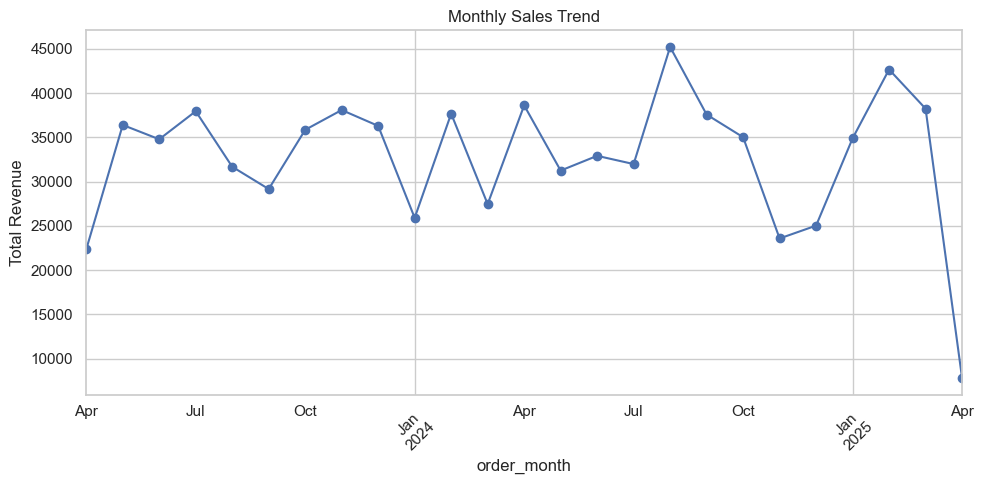

Top 5 Customers by Revenue:
 customer_id
C0399    9675.38
C0209    9546.48
C0386    8290.62
C0478    7786.44
C0203    7138.87
Name: total_amount, dtype: float64


In [69]:
# Sales trend over time
sales_data['order_month'] = sales_data['order_date'].dt.to_period('M')
monthly_sales = sales_data.groupby('order_month')['total_amount'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 customers
top_customers = sales_data.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Revenue:\n", top_customers)

In [100]:
sales_data.to_csv(r"D:\Projects\New folder\Cleaned data\sales_cleaned.csv", index=False)
customers.to_csv(r"D:\Projects\New folder\Cleaned data\customers_cleaned.csv", index=False)
products.to_csv(r"D:\Projects\New folder\Cleaned data\products_cleaned.csv", index=False)
stores.to_csv(r"D:\Projects\New folder\Cleaned data\stores_cleaned.csv", index=False)
returns.to_csv(r"D:\Projects\New folder\Cleaned data\returns_cleaned.csv", index=False)
